In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_utilities_pumps=r"D:\Download\python_projects\tableak_adult_gen\all_exp_result\model_utilities_PUMS.csv"
path_recon_pumps=r"D:\Download\python_projects\tableak_adult_gen\all_exp_result\reconstruction_results_pumps.xlsx"

In [3]:
df_model_utitlities_pums = pd.read_csv(path_utilities_pumps)
df_model_utitlities_pums.drop(columns=['Unnamed: 0'], inplace=True)
df_model_utitlities_pums.head()

,TPR,F1 Score,Loss,Accuracy,data size,model_type,dataset,model,pre_trained_model
0,0.753878,0.756489,0.564165,0.753878,166771,normal,pums,AL,with_pre_trained
1,0.729965,0.731937,0.572073,0.729965,166771,normal,pums,AK,with_pre_trained
2,0.749921,0.752727,0.563986,0.749921,166771,normal,pums,AZ,with_pre_trained
3,0.757092,0.759289,0.563744,0.757092,166771,normal,pums,AR,with_pre_trained
4,0.734216,0.736477,0.568857,0.734216,166771,normal,pums,CA,with_pre_trained


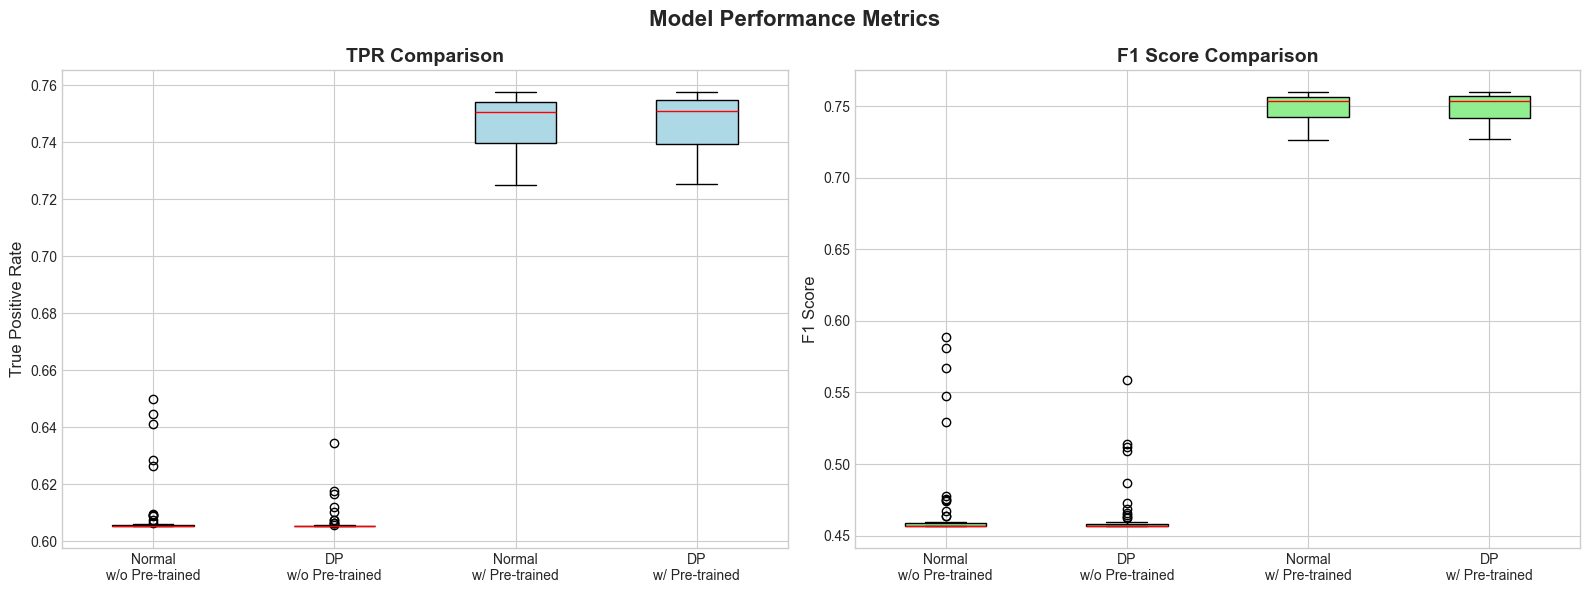

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

without_df = df_model_utitlities_pums[df_model_utitlities_pums["pre_trained_model"]=="without_pre_trained"]
with_df = df_model_utitlities_pums[df_model_utitlities_pums["pre_trained_model"]=="with_pre_trained"]

without_normal_tpr = without_df[without_df["model_type"] == "normal"]["TPR"].tolist()
without_dp_tpr = without_df[without_df["model_type"] == "dp"]["TPR"].tolist()
without_normal_f1 = without_df[without_df["model_type"] == "normal"]["F1 Score"].tolist()
without_dp_f1 = without_df[without_df["model_type"] == "dp"]["F1 Score"].tolist()

with_normal_tpr = with_df[with_df["model_type"] == "normal"]["TPR"].tolist()
with_dp_tpr = with_df[with_df["model_type"] == "dp"]["TPR"].tolist()
with_normal_f1 = with_df[with_df["model_type"] == "normal"]["F1 Score"].tolist()
with_dp_f1 = with_df[with_df["model_type"] == "dp"]["F1 Score"].tolist()

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.tight_layout(pad=4.0)

tpr_data = [without_normal_tpr, without_dp_tpr, with_normal_tpr, with_dp_tpr]
ax1.boxplot(tpr_data, patch_artist=True, 
           boxprops=dict(facecolor='lightblue'), 
           medianprops=dict(color='red'))
ax1.set_xticklabels(["Normal\nw/o Pre-trained", "DP\nw/o Pre-trained", 
                     "Normal\nw/ Pre-trained", "DP\nw/ Pre-trained"])
ax1.set_title("TPR Comparison", fontsize=14, fontweight='bold')
ax1.set_ylabel("True Positive Rate", fontsize=12)

f1_data = [without_normal_f1, without_dp_f1, with_normal_f1, with_dp_f1]
ax2.boxplot(f1_data, patch_artist=True, 
           boxprops=dict(facecolor='lightgreen'), 
           medianprops=dict(color='red'))
ax2.set_xticklabels(["Normal\nw/o Pre-trained", "DP\nw/o Pre-trained", 
                     "Normal\nw/ Pre-trained", "DP\nw/ Pre-trained"])
ax2.set_title("F1 Score Comparison", fontsize=14, fontweight='bold')
ax2.set_ylabel("F1 Score", fontsize=12)

plt.suptitle("Model Performance Metrics", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Recon. Plots

In [6]:
path_recon_pumps=r"D:\Download\python_projects\tableak_adult_gen\all_exp_result\reconstruction_results_pumps.xlsx"

In [7]:
excel_file = pd.ExcelFile(path_recon_pumps)
sheets = excel_file.sheet_names
sheets_count = len(sheets)
print(f"Total sheets: {sheets_count}")

Total sheets: 33


In [8]:
# sheets

In [17]:
PUMS_inve_norm_REG_NPR = pd.read_excel(path_recon_pumps, sheet_name="PUMS_inve_norm_REG_NPR")
PUMS_inve_dp_REG_NPR = pd.read_excel(path_recon_pumps, sheet_name="PUMS_inve_dp_REG_NPR")

# PUMS_inve_norm_REG_NPR.head(2)



In [18]:
PUMS_inve_norm_REG_PRE = pd.read_excel(path_recon_pumps, sheet_name="PUMS_inve_norm_REG_PRE")
PUMS_inve_dp_REG_PRE = pd.read_excel(path_recon_pumps, sheet_name="PUMS_inve_dp_REG_PRE")

# PUMS_inve_norm_REG_PRE.head(2)

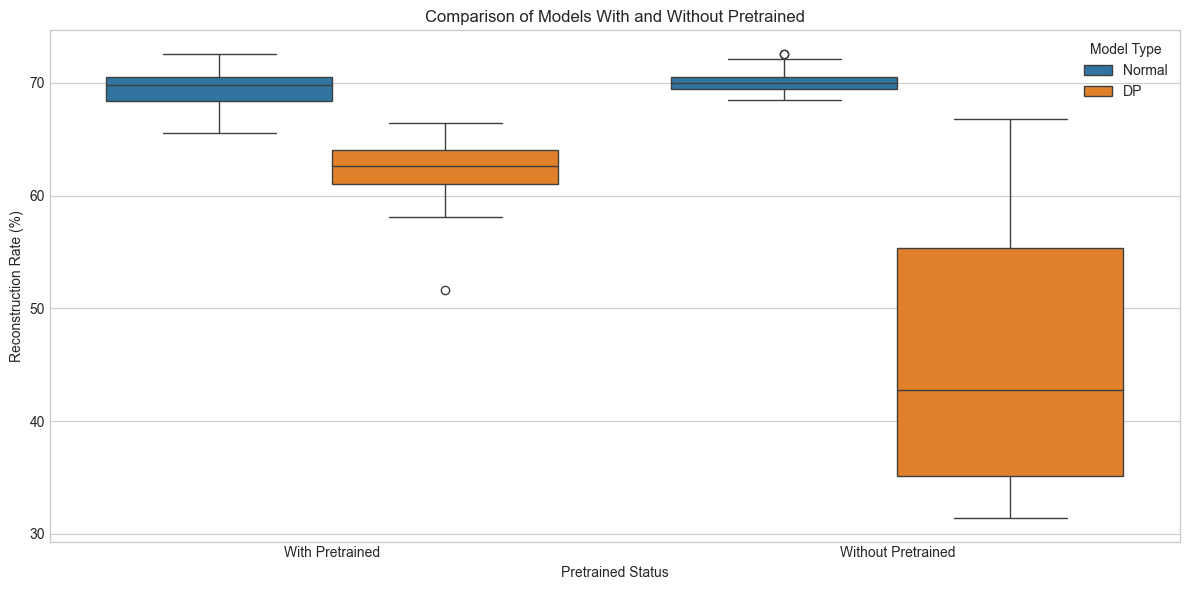

In [ ]:
data_pre = pd.DataFrame({
    'Normal': PUMS_inve_norm_REG_PRE["overall"],
    'DP': PUMS_inve_dp_REG_PRE["overall"]
})
data_pre_melted = pd.melt(data_pre, var_name='Model', value_name='Values')
data_pre_melted['Pretrained'] = 'With Pretrained'

data_npr = pd.DataFrame({
    'Normal': PUMS_inve_norm_REG_NPR["overall"],
    'DP': PUMS_inve_dp_REG_NPR["overall"]
})
data_npr_melted = pd.melt(data_npr, var_name='Model', value_name='Values')
data_npr_melted['Pretrained'] = 'Without Pretrained'

combined_data = pd.concat([data_pre_melted, data_npr_melted])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Pretrained', y='Values', hue='Model', data=combined_data)
plt.title('Comparison of Models With and Without Pretrained')
plt.xlabel('Pretrained Status')
plt.ylabel('Reconstruction Rate (%)')
plt.legend(title='Model Type')
plt.tight_layout()
plt.show()
